<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


# **Data Engineering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_train_all.csv')

test_data = pd.read_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_test.csv')

In [ ]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0


In [ ]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       31 non-null     int64  
 1   sex       31 non-null     int64  
 2   cp        31 non-null     int64  
 3   trestbps  31 non-null     int64  
 4   chol      31 non-null     int64  
 5   fbs       31 non-null     int64  
 6   restecg   31 non-null     int64  
 7   thalach   31 non-null     int64  
 8   exang     31 non-null     int64  
 9   oldpeak   31 non-null     float64
 10  slope     31 non-null     int64  
 11  ca        31 non-null     int64  
 12  thal      31 non-null     int64  
 13  target    31 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 3.5 KB


In [ ]:
null_counts = train_data.isnull().sum()
print(null_counts)

age         0
sex         1
cp          1
trestbps    1
chol        2
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       2
ca          0
thal        1
target      1
dtype: int64


In [ ]:
test_null_counts = test_data.isnull().sum()
print(test_null_counts)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
train_data.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,273.000000,272.000000,271.000000,273.000000,272.000000,272.000000,273.000000,273.000000,271.000000,273.000000,272.000000,272.000000
mean,54.289377,131.477941,245.678967,0.150183,0.522059,149.750000,0.329670,1.016484,1.398524,0.736264,2.297794,0.547794
std,9.160766,17.852395,51.447387,0.357907,0.529107,23.204768,0.470957,1.184296,0.617520,1.034356,0.622098,0.498628
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,210.500000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,241.000000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
test_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,55.193548,0.709677,1.032258,135.096774,251.806452,0.129032,0.580645,148.645161,0.322581,1.319355,1.354839,0.645161,2.483871,0.483871
std,8.332344,0.461414,1.139704,14.985226,57.526469,0.340777,0.501610,20.441051,0.475191,0.976872,0.660726,0.914636,0.508001,0.508001
min,40.000000,0.000000,0.000000,110.000000,172.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,50.000000,0.000000,0.000000,126.000000,217.500000,0.000000,0.000000,134.500000,0.000000,0.550000,1.000000,0.000000,2.000000,0.000000
50%,58.000000,1.000000,0.000000,135.000000,234.000000,0.000000,1.000000,153.000000,0.000000,1.200000,1.000000,0.000000,2.000000,0.000000
75%,60.000000,1.000000,2.000000,147.500000,286.000000,0.000000,1.000000,162.500000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,71.000000,1.000000,3.000000,170.000000,417.000000,1.000000,1.000000,179.000000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000


了解何為不合理數值

年齡 (age) 醫學合理範圍：20至100歲 不合理數值： 小於20歲：一般而言，此類心臟病資料集多針對成人，小於20歲較少見。 大於100歲：超過100歲的患者較罕見且可能為資料錯誤。

靜息血壓 (trestbps) 醫學合理範圍：80 至 220 mmHg 不合理數值： 小於80 mmHg：顯著低血壓，很可能資料輸入錯誤。 大於220 mmHg：極高的血壓值少見於臨床常態，可能為量測或輸入錯誤。

膽固醇 (chol) 醫學合理範圍：100 至 600 mg/dl 不合理數值： 小於100 mg/dl：過低的膽固醇值極為少見，可能表示資料錯誤或檢驗失誤。 大於600 mg/dl：極端高膽固醇值在臨床上少見，應視為異常數據。

最大心跳率 (thalach) 醫學合理範圍：60 至 220 bpm 不合理數值： 小於60 bpm：極低的最大心跳率在一般狀況下不太可能，需檢查資料正確性。 大於220 bpm：超過人類生理極限，為明顯不合理資料。

心電圖 ST 段下降 (oldpeak) 醫學合理範圍：0 至 6（一般臨床數值） 不合理數值： 小於0：不合理，心電圖ST下降不可能為負數。 大於6：臨床上極端少見且幾乎不合理，可能為錯誤數據。

主要血管數量 (ca) 醫學合理範圍：0 至 4 不合理數值： 小於0 或 大於4：解剖結構上不可能，因冠狀動脈主要數量通常為0到4之間。

thal欄位（地中海貧血基因型） 醫學合理數值：1（正常）, 2（固定缺損）, 3（可逆缺損） 不合理數值： 不在1、2、3範圍內（例如負數、0或大於3）：不符醫學定義，視為錯誤。

In [ ]:
for column in train_data.columns:
    print(f"Column：{column}")
    print(train_data[column].value_counts())
    print("\n")

Column：age
age
57    17
58    16
54    14
52    13
59    12
56    11
62    11
51    10
64    10
67     9
44     9
41     9
63     9
45     8
60     8
46     7
48     7
42     7
53     7
43     7
55     7
65     6
66     6
61     6
47     5
49     5
70     4
50     4
35     4
39     4
68     4
38     3
34     2
40     2
71     2
37     2
69     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64


Column：sex
sex
Female    185
Male       87
Name: count, dtype: int64


Column：cp
cp
low       127
high       76
medium     49
severe     20
Name: count, dtype: int64


Column：trestbps
trestbps
120.0    34
130.0    31
140.0    26
110.0    17
138.0    13
150.0    11
128.0    11
125.0    11
160.0    10
132.0     7
112.0     7
118.0     7
108.0     6
135.0     5
134.0     5
124.0     5
152.0     5
145.0     4
122.0     4
100.0     4
170.0     4
105.0     3
180.0     3
142.0     3
115.0     3
136.0     3
126.0     3
144.0     2
146.0     2
178.0     2
94.0      2
148.0     2
155.0     1

In [ ]:
for column in test_data.columns:
    print(f"Column：{column}")
    print(test_data[column].value_counts())
    print("\n")

Column：age
age
50    3
58    3
59    3
60    3
61    2
44    2
65    2
54    2
51    2
66    1
40    1
42    1
43    1
69    1
53    1
71    1
55    1
41    1
Name: count, dtype: int64


Column：sex
sex
1    22
0     9
Name: count, dtype: int64


Column：cp
cp
0    16
2    11
3     3
1     1
Name: count, dtype: int64


Column：trestbps
trestbps
150    6
140    6
130    5
120    3
110    2
112    2
135    1
160    1
132    1
124    1
128    1
145    1
170    1
Name: count, dtype: int64


Column：chol
chol
226    2
243    2
233    2
219    1
247    1
340    1
234    1
239    1
199    1
302    1
212    1
175    1
417    1
197    1
353    1
225    1
330    1
230    1
290    1
253    1
266    1
172    1
305    1
216    1
188    1
282    1
185    1
326    1
Name: count, dtype: int64


Column：fbs
fbs
0    27
1     4
Name: count, dtype: int64


Column：restecg
restecg
1    18
0    13
Name: count, dtype: int64


Column：thalach
thalach
158    2
114    2
178    2
157    2
142    2
172    1
161    1
17

In [ ]:
train_data['sex'] = train_data['sex'].map({'Male': 0, 'Female': 1})
train_data['cp'] = train_data['cp'].map({'low': 0, 'medium': 1, 'high': 2, 'severe': 3})

numeric_cols = ['trestbps', 'chol', 'thalach', 'thal', 'slope']
for col in numeric_cols:
    train_data[col] = train_data[col].fillna(train_data[col].median())

categorical_cols = ['sex', 'cp', 'restecg', 'target']
for col in categorical_cols:
    # Get the mode, but handle the case where it's empty
    mode_result = train_data[col].mode()
    if not mode_result.empty:  # Check if mode_result has any values
        train_data[col] = train_data[col].fillna(mode_result[0])
    else:
        # Handle the case where mode is empty, e.g., fill with a default value
        train_data[col] = train_data[col].fillna(train_data[col].dropna().sample(1).iloc[0] if train_data[col].dropna().size else 0)

reasonable_ranges = {
    'age': (20, 100),
    'trestbps': (80, 220),
    'chol': (100, 600),
    'thalach': (60, 220),
    'oldpeak': (0, 6),
    'ca': (0, 4),
    'thal': (1, 3)
}

for col, (min_val, max_val) in reasonable_ranges.items():
    unreasonable_data = train_data[(train_data[col] < min_val) | (train_data[col] > max_val)]
    if not unreasonable_data.empty:
        print(f"不合理數值存在於欄位: {col}")
        print(unreasonable_data[[col]])

不合理數值存在於欄位: oldpeak
     oldpeak
144      6.2
不合理數值存在於欄位: thal
     thal
18    0.0
221   0.0


In [ ]:
test_data['sex'] = test_data['sex'].map({'Male': 0, 'Female': 1})
test_data['cp'] = test_data['cp'].map({'low': 0, 'medium': 1, 'high': 2, 'severe': 3})

numeric_cols = ['trestbps', 'chol', 'thalach', 'thal', 'slope']
for col in numeric_cols:
    test_data[col] = test_data[col].fillna(test_data[col].median())

categorical_cols = ['sex', 'cp', 'restecg', 'target']
for col in categorical_cols:
    # Get the mode, but handle the case where it's empty
    mode_result = test_data[col].mode()
    if not mode_result.empty:  # Check if mode_result has any values
        test_data[col] = test_data[col].fillna(mode_result[0])
    else:
        # Handle the case where mode is empty, e.g., fill with a default value
        test_data[col] = test_data[col].fillna(test_data[col].dropna().sample(1).iloc[0] if test_data[col].dropna().size else 0)

reasonable_ranges = {
    'age': (20, 100),
    'trestbps': (80, 220),
    'chol': (100, 600),
    'thalach': (60, 220),
    'oldpeak': (0, 6),
    'ca': (0, 4),
    'thal': (1, 3)
}

for col, (min_val, max_val) in reasonable_ranges.items():
    unreasonable_data = test_data[(test_data[col] < min_val) | (test_data[col] > max_val)]
    if not unreasonable_data.empty:
        print(f"不合理數值存在於欄位: {col}")
        print(unreasonable_data[[col]])

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_train_all.csv')

sex_mapping = {'Male': 1, 'Female': 0}
train_data['sex'] = train_data['sex'].map(sex_mapping)

cp_mapping = {'low': 0, 'medium': 1, 'high': 2, 'severe': 3}
train_data['cp'] = train_data['cp'].map(cp_mapping)

numeric_cols = ['trestbps', 'chol', 'thalach', 'thal', 'slope']
for col in numeric_cols:
    # Direct assignment instead of inplace=True
    train_data[col] = train_data[col].fillna(train_data[col].median())

categorical_cols = ['sex', 'cp', 'restecg', 'target']
for col in categorical_cols:
    # Direct assignment instead of inplace=True
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

train_data = train_data[
    (train_data['age'].between(20, 100)) &
    (train_data['trestbps'].between(80, 220)) &
    (train_data['chol'].between(100, 600)) &
    (train_data['thalach'].between(60, 220)) &
    (train_data['oldpeak'].between(0, 6)) &
    (train_data['ca'].between(0, 4))
]

print(train_data.isnull().sum())

print(train_data.dtypes)

train_data.to_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_train_cleaned.csv', index=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target      float64
dtype: object


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_test.csv')

sex_mapping = {'Male': 1, 'Female': 0}
test_data['sex'] = test_data['sex'].map(sex_mapping)

cp_mapping = {'low': 0, 'medium': 1, 'high': 2, 'severe': 3}
test_data['cp'] = test_data['cp'].map(cp_mapping)

numeric_cols = ['trestbps', 'chol', 'thalach', 'thal', 'slope']
for col in numeric_cols:
    # Direct assignment instead of inplace=True
    test_data[col] = test_data[col].fillna(test_data[col].median())

categorical_cols = ['sex', 'cp', 'restecg', 'target']
for col in categorical_cols:
    # Direct assignment instead of inplace=True
    # Get the mode, but handle the case where it's empty
    mode_result = test_data[col].mode()
    if not mode_result.empty:  # Check if mode_result has any values
        test_data[col] = test_data[col].fillna(mode_result.iloc[0]) # Use iloc to access by position
    else:
        # Handle the case where mode is empty, e.g., fill with a default value
        # If the column has any non-NA values, sample one; otherwise, fill with 0
        test_data[col] = test_data[col].fillna(test_data[col].dropna().sample(1).iloc[0] if test_data[col].dropna().size else 0)


test_data = test_data[
    (test_data['age'].between(20, 100)) &
    (test_data['trestbps'].between(80, 220)) &
    (test_data['chol'].between(100, 600)) &
    (test_data['thalach'].between(60, 220)) &
    (test_data['oldpeak'].between(0, 6)) &
    (test_data['ca'].between(0, 4))
]

print(test_data.isnull().sum())

print(test_data.dtypes)

test_data.to_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_test_cleaned.csv', index=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex         float64
cp          float64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,54.261029,0.316176,0.959559,131.367647,245.944853,0.150735,0.522059,149.777574,0.330882,0.997426,1.400735,0.727941,2.294118,0.551471
std,9.165648,0.465840,1.021097,17.768004,51.113006,0.358450,0.529107,23.203559,0.471398,1.143775,0.611452,1.027065,0.620887,0.498260
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,0.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.750000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [ ]:
test_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,55.193548,0.0,0.0,135.096774,251.806452,0.129032,0.580645,148.645161,0.322581,1.319355,1.354839,0.645161,2.483871,0.483871
std,8.332344,0.0,0.0,14.985226,57.526469,0.340777,0.501610,20.441051,0.475191,0.976872,0.660726,0.914636,0.508001,0.508001
min,40.000000,0.0,0.0,110.000000,172.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,50.000000,0.0,0.0,126.000000,217.500000,0.000000,0.000000,134.500000,0.000000,0.550000,1.000000,0.000000,2.000000,0.000000
50%,58.000000,0.0,0.0,135.000000,234.000000,0.000000,1.000000,153.000000,0.000000,1.200000,1.000000,0.000000,2.000000,0.000000
75%,60.000000,0.0,0.0,147.500000,286.000000,0.000000,1.000000,162.500000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,71.000000,0.0,0.0,170.000000,417.000000,1.000000,1.000000,179.000000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000


## A. Checking and Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_train_cleaned.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,1.0,1.0,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,0.0,0.0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,0.0,1.0,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,0.0,2.0,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,0.0,3.0,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,40,0.0,0.0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
268,60,0.0,0.0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
269,64,0.0,2.0,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
270,43,0.0,0.0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       272 non-null    int64  
 1   sex       272 non-null    float64
 2   cp        272 non-null    float64
 3   trestbps  272 non-null    float64
 4   chol      272 non-null    float64
 5   fbs       272 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     272 non-null    int64  
 9   oldpeak   272 non-null    float64
 10  slope     272 non-null    float64
 11  ca        272 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 29.9 KB


In [ ]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(272, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,54.261029,0.316176,0.959559,131.367647,245.944853,0.150735,0.522059,149.777574,0.330882,0.997426,1.400735,0.727941,2.294118,0.551471
std,9.165648,0.465840,1.021097,17.768004,51.113006,0.358450,0.529107,23.203559,0.471398,1.143775,0.611452,1.027065,0.620887,0.498260
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,0.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.750000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.052331,-0.095071,0.260071,0.213895,0.114896,-0.119511,-0.405199,0.119999,0.198585,-0.151735,0.255306,0.078535,-0.248989
sex,0.052331,1.000000,0.034738,0.047427,0.177252,-0.043385,0.061425,0.052105,-0.125287,-0.119664,0.045818,-0.158901,-0.207880,0.295279
cp,-0.095071,0.034738,1.000000,0.041703,-0.070321,0.067125,0.011902,0.301994,-0.424399,-0.171020,0.132436,-0.168865,-0.132499,0.413891
trestbps,0.260071,0.047427,0.041703,1.000000,0.139148,0.174930,-0.140991,-0.056380,0.073535,0.167620,-0.112449,0.083553,0.063749,-0.169702
chol,0.213895,0.177252,-0.070321,0.139148,1.000000,0.000657,-0.170033,-0.026888,0.059416,0.114482,-0.046282,0.081884,0.128299,-0.102834
fbs,0.114896,-0.043385,0.067125,0.174930,0.000657,1.000000,-0.085693,-0.013700,0.031312,0.018050,-0.057750,0.171941,-0.000975,-0.074591
restecg,-0.119511,0.061425,0.011902,-0.140991,-0.170033,-0.085693,1.000000,0.030232,-0.088549,-0.032527,0.069525,-0.043238,0.002643,0.093655
thalach,-0.405199,0.052105,0.301994,-0.056380,-0.026888,-0.013700,0.030232,1.000000,-0.401447,-0.348341,0.371203,-0.202522,-0.076636,0.427642
exang,0.119999,-0.125287,-0.424399,0.073535,0.059416,0.031312,-0.088549,-0.401447,1.000000,0.320510,-0.282493,0.118022,0.195788,-0.465535
oldpeak,0.198585,-0.119664,-0.171020,0.167620,0.114482,0.018050,-0.032527,-0.348341,0.320510,1.000000,-0.567830,0.200437,0.191767,-0.445564


#### Converting the DataFrame to a NumPy Array

In [ ]:
import numpy as np

np_data = df.values
np_data.shape

(272, 14)

In [ ]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 190 and 82.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [ ]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.Dropout(0.25),

            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.Dropout(0.2),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Dropout(0.1),

            nn.Linear(128, 2)
        )

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.model:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.model(x)


## C. Training the Neural Network

In [ ]:
# Check your GPU status.
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm
import numpy as np
import torch.nn as nn

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=60)

def clip_gradient(model, max_norm=1.0):
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm, norm_type=2.0) # L2 regularization

def add_gaussian_noise(features, mean=0.0, std=0.06):
    noise = torch.randn_like(features) * std + mean
    return features + noise

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features
        labels = labels

        # Apply Gaussian noise augmentation only during training
        features = add_gaussian_noise(features)

        outputs = model(features)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        clip_gradient(model)
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features
            labels = labels

            outputs = model(features)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 4.4681, Train acc: 60.0000%, Val loss: 5.1697, Val acc: 46.3415%, Best Val loss: 5.1697 Best Val acc: 46.34%
Epoch 2/100, Train loss: 2.3878, Train acc: 63.1579%, Val loss: 30.5508, Val acc: 59.7561%, Best Val loss: 5.1697 Best Val acc: 59.76%
Epoch 3/100, Train loss: 1.9899, Train acc: 61.5789%, Val loss: 5.7468, Val acc: 60.9756%, Best Val loss: 5.1697 Best Val acc: 60.98%
Epoch 4/100, Train loss: 1.9214, Train acc: 62.6316%, Val loss: 2.6802, Val acc: 65.8537%, Best Val loss: 2.6802 Best Val acc: 65.85%
Epoch 5/100, Train loss: 1.2260, Train acc: 72.1053%, Val loss: 2.8705, Val acc: 56.0976%, Best Val loss: 2.6802 Best Val acc: 65.85%
Epoch 6/100, Train loss: 1.2356, Train acc: 72.6316%, Val loss: 2.6978, Val acc: 62.1951%, Best Val loss: 2.6802 Best Val acc: 65.85%
Epoch 7/100, Train loss: 1.4684, Train acc: 69.4737%, Val loss: 6.3744, Val acc: 62.1951%, Best Val loss: 2.6802 Best Val acc: 65.85%
Epoch 8/100, Train loss: 1.0851, Train acc: 72.1053%, Val los

#### Visualizing the model performance

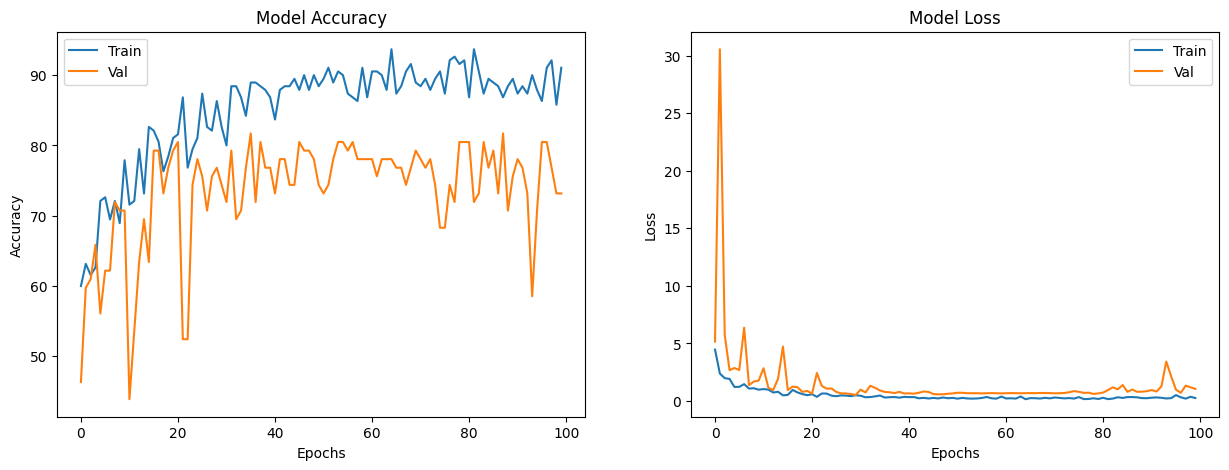

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [ ]:
# read test file
test_data = pd.read_csv('/content/drive/MyDrive/NTHU/iPhD113_2_lab2/heart_dataset_test_cleaned.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0.0,0.0,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0.0,0.0,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0.0,0.0,150,226,0,1,114,0,2.6,0,0,2,1
3,43,0.0,0.0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0.0,0.0,140,239,0,1,151,0,1.8,2,2,2,1


In [ ]:
test_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
test_data = test_data.values
test_data.shape

(31, 14)

In [ ]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features
        labels = labels

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 80.64516129032258%
